In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)

    size(sqft)  bedrooms  floors   age
0       1244.0       3.0     1.0  64.0
1       1947.0       3.0     2.0  17.0
2       1725.0       3.0     2.0  42.0
3       1959.0       3.0     2.0  15.0
4       1314.0       2.0     1.0  14.0
..         ...       ...     ...   ...
94      1224.0       2.0     2.0  12.0
95      1432.0       2.0     1.0  43.0
96      1660.0       3.0     2.0  19.0
97      1212.0       3.0     1.0  20.0
98      1050.0       2.0     1.0  65.0

[99 rows x 4 columns]
    price
0   300.0
1   509.8
2   394.0
3   540.0
4   415.0
..    ...
94  329.0
95  388.0
96  390.0
97  356.0
98  257.8

[99 rows x 1 columns]


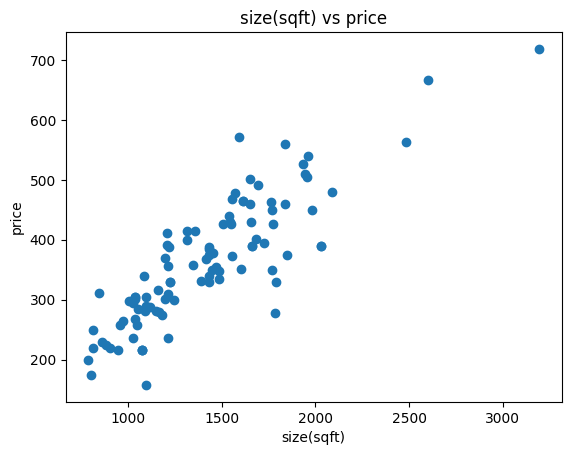

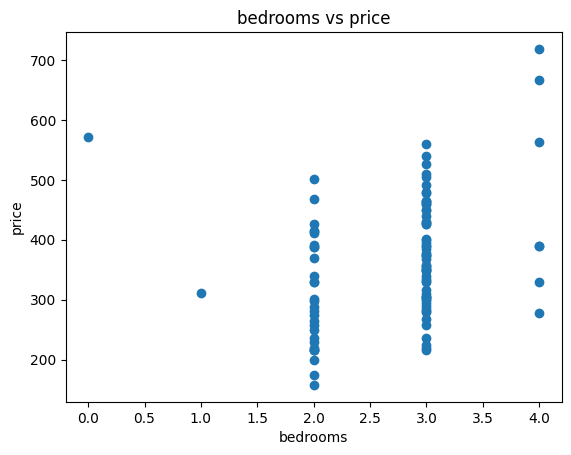

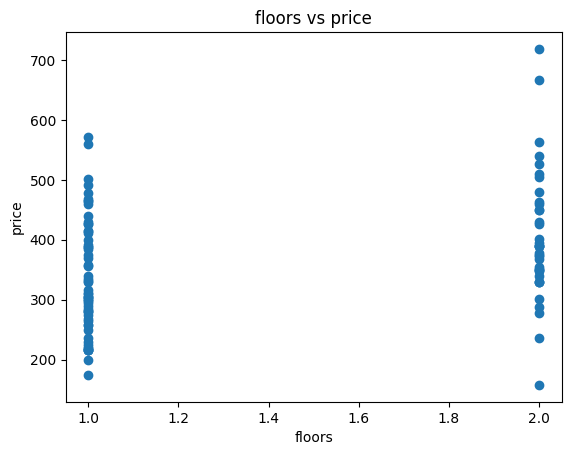

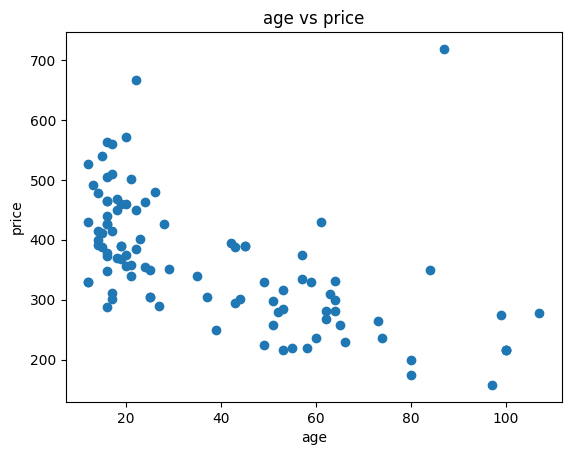

In [8]:
df_X_train = pd.read_csv("./training-data/housing_data.csv")
df_y_train = pd.read_csv("./training-data/housing_prices.csv")
print(df_X_train)
print(df_y_train)

X_train = df_X_train.to_numpy()
y_train = df_y_train.to_numpy()
col_names = df_X_train.columns.values

for col in range(X_train.shape[1]):
    col_name = col_names[col]
    plt.scatter(X_train[:, col], y_train)
    plt.title(f"{col_name} vs price")
    plt.xlabel(f"{col_name}")
    plt.ylabel("price")
    plt.show()

In [15]:
def z_score_normalize(feature_matrix):
    """
    z = (X - mu) / sigma
    where:
        X = features (matrix)
        mu = mean (vector)
        sigma = standar deviation (vector)
        
        z = z-score normalized features (matrix)
    """

    X = feature_matrix
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    z = (X - mu) / sigma

    return z    

In [21]:
X_train_norm = z_score_normalize(X_train)
X_train_norm.ptp(axis=0)

array([5.85, 6.14, 2.06, 3.69])

In [34]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost where cost is expressed as J(w,b) below:

    J(w,b) = (1 / 2*m) * sum across all data points (rows) of [ f_w,b(x)_i - y_i ] ^ 2

    """

    m = X.shape[1]
    J_wb = 0.0
    for i in range(m): # iterate over each data point (row)
        J_wb_i = np.dot(w, X[i]) + b
        J_wb += J_wb_i

    J_wb /= (2 * m)

    return J_wb

In [35]:
compute_cost(X_train_norm, y_train, np.array([1.0, 1.0, 1.0, 1.0]), 0.0)

0.882908488140814